# Analysis of the data from NFL Games played in the last decade

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

## Cleaning/Initial Analaysis

In [4]:
nfl_data = pd.read_csv("nflcombine.csv")
nfl_data = nfl_data.drop(columns=['Unnamed: 0'])
nfl_data.head()

,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner
0,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019,San Francisco 49ers
1,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019,San Francisco 49ers
2,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019,San Francisco 49ers
3,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,99.0,2.0,10.0,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers,2019,San Francisco 49ers
4,Washington Redskins,9.0,0.0,17.0,283.0,146.0,137.0,1.0,10.0,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,San Francisco 49ers,2019,San Francisco 49ers


In [10]:
nfl_data.describe()

,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Year
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,23.225698,23.027933,20.501676,348.048045,231.830168,116.217877,1.773184,20.456983,346.213408,230.554190,115.659218,1.777654,2.345296,-2.108760,-0.030872,2020.167598
std,9.855353,9.891712,4.985858,85.873697,79.250306,51.796933,1.000535,5.036344,86.111474,79.536163,51.477706,1.007107,11.939509,12.013528,5.010320,0.980150
min,0.000000,0.000000,6.000000,105.000000,-6.000000,3.000000,1.000000,6.000000,105.000000,-6.000000,3.000000,1.000000,-35.650000,-40.690000,-17.390000,2019.000000
25%,17.000000,17.000000,17.000000,285.500000,175.000000,78.000000,1.000000,17.000000,283.000000,174.000000,78.000000,1.000000,-4.800000,-9.875000,-3.410000,2019.000000
50%,23.000000,23.000000,21.000000,354.000000,229.000000,109.000000,1.000000,21.000000,352.000000,228.000000,108.000000,1.000000,3.210000,-2.830000,-0.060000,2020.000000
75%,30.000000,30.000000,24.000000,405.500000,282.500000,145.000000,2.000000,24.000000,403.500000,280.500000,144.000000,2.000000,9.930000,5.310000,3.355000,2021.000000
max,56.000000,56.000000,36.000000,592.000000,490.000000,404.000000,7.000000,36.000000,592.000000,490.000000,404.000000,7.000000,40.690000,35.650000,17.390000,2022.000000


In [11]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Opp        895 non-null    object 
 1   Tm         895 non-null    float64
 2   Opp.1      895 non-null    float64
 3   1stD       895 non-null    float64
 4   TotYd      895 non-null    float64
 5   PassY      895 non-null    float64
 6   RushY      895 non-null    float64
 7   TO         895 non-null    float64
 8   1stD.1     895 non-null    float64
 9   TotYd.1    895 non-null    float64
 10  PassY.1    895 non-null    float64
 11  RushY.1    895 non-null    float64
 12  TO.1       895 non-null    float64
 13  Offense    895 non-null    float64
 14  Defense    895 non-null    float64
 15  Sp. Tms    895 non-null    float64
 16  Home_team  895 non-null    object 
 17  Year       895 non-null    int64  
 18  Winner     891 non-null    object 
dtypes: float64(15), int64(1), object(3)
memory usage: 

## Does Home Field Advantage Exist?

**I will conduct a 1 Proportion Z-Test to determine whether the chance of the home team winning is greater than 50% or not with a significance level of 0.05**


**Ho** = The proportion of home team wins is equal to 50%

**Ha** = The proportion of home team wins is greater than 50%

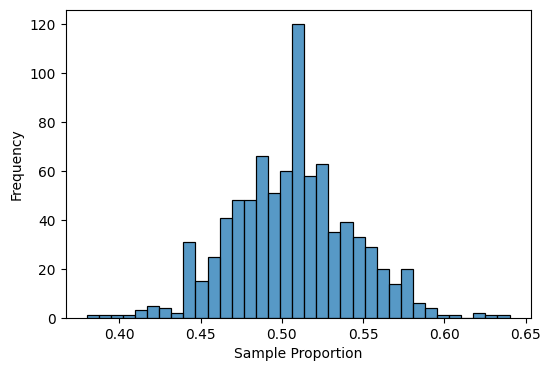

In [32]:
sample_size = 150
num_samples = 850

sample_proportions = []
for i in range(num_samples):
    sample = nfl_data.sample(n=sample_size, replace=False)
    proportion = (sample["Home_team"] == sample["Winner"]).mean()
    sample_proportions.append(proportion)

plt.figure(figsize=(6,4))
sns.histplot(sample_proportions, bins=35)
plt.xlabel("Sample Proportion")
plt.ylabel("Frequency")
plt.show()

Since our sample size (150) is big enough for the central limit theorem to apply, we are able to conduct the test

In [41]:
from statsmodels.stats.proportion import proportions_ztest


sample = nfl_data.sample(n=sample_size, replace=False, random_state=42)
homeTeamWin = sample[sample["Home_team"] == sample["Winner"]]
zStatistic, pValue = proportions_ztest(homeTeamWin.shape[0], sample.shape[0], 0.5, alternative="larger", prop_var=False)

print(zStatistic, pValue)

1.1481067942068246 0.1254622398694959


Since the p-value is greater than α (in our example, p = 0.12 > 0.05), we fail to reject the null hypothesis. This means we do not have evidence to conclude that a home field advantage exists.

While this test isn't perfect (an injury in one game may affect another game meaning each game isn't independent), it provides an overview of the general trend in home team performance. Despite a potential violation of independence, the 1-proportion z-test offers a useful starting point for assessing whether home field advantage exists in the data. Further analysis will need to be conducted in order to eliminate confounding variables.

## Logistic Regression Predicting if the Home Team Won

Backwards Elimination was used so the strongest features were kept in the model

In [53]:
predictors = ["1stD", "TotYd", "PassY", "RushY", "TO", "TotYd.1", "TO.1", "Offense", "Defense"]
X = nfl_data[predictors]
X = sm.add_constant(X)
nfl_data["home_team_win"] = nfl_data["Home_team"] == nfl_data["Winner"]
y = nfl_data["home_team_win"].astype(int)

while True:
    model = sm.Logit(y, X).fit(disp=True)
    pvalues = model.pvalues.drop("const")
    max_pval = pvalues.max()
    if max_pval > 0.05:
        worst_feature = pvalues.idxmax()
        print(f"Removing {worst_feature} with p-value {max_pval}")
        X = X.drop(columns=[worst_feature])
    else:
        break
print(model.summary())



         Current function value: 0.244445
         Iterations: 35
Removing 1stD with p-value 0.9330465829580432
         Current function value: 0.244449
         Iterations: 35
Removing TO with p-value 0.0827247944148699
         Current function value: 0.246142
         Iterations: 35
Removing RushY with p-value 0.9999999799673248
Optimization terminated successfully.
         Current function value: 0.246142
         Iterations 8
Removing TotYd with p-value 0.22649191205794517
Optimization terminated successfully.
         Current function value: 0.246966
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          home_team_win   No. Observations:                  895
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Jul 2025   Pseudo R-squ.:                  0.6437
Time:             

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
